<a href="https://colab.research.google.com/github/sakp7/Text-extractor-from-pdf-s-and-images/blob/main/Text_detection_form_image_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello there,
This is a text extraction project from images and pdf's by using only cv2 and tesseract.**

In [2]:
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,821 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database .

In [3]:
!pip install tesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=5d7fe691cee0b2380ca2f2cafeb428212734c58174de348ad5c1e5653986ee0c
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [4]:
import cv2
import pytesseract
from PIL import Image


In [5]:
def load_image(filename):
    img = cv2.imread(filename)
    return img


In [34]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    return gray


In [7]:
def apply_ocr(image):
    text = pytesseract.image_to_string(image)
    return text


In [43]:
def add_padding(image, padding):
    padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT)
    cv2_imshow(padded_image)
    return padded_image

In [36]:
def process_image(filename):
    image = load_image(filename)
    processed_image = preprocess_image(image)
    processed_image=add_padding(processed_image,100)

    text = apply_ocr(processed_image)
    return text


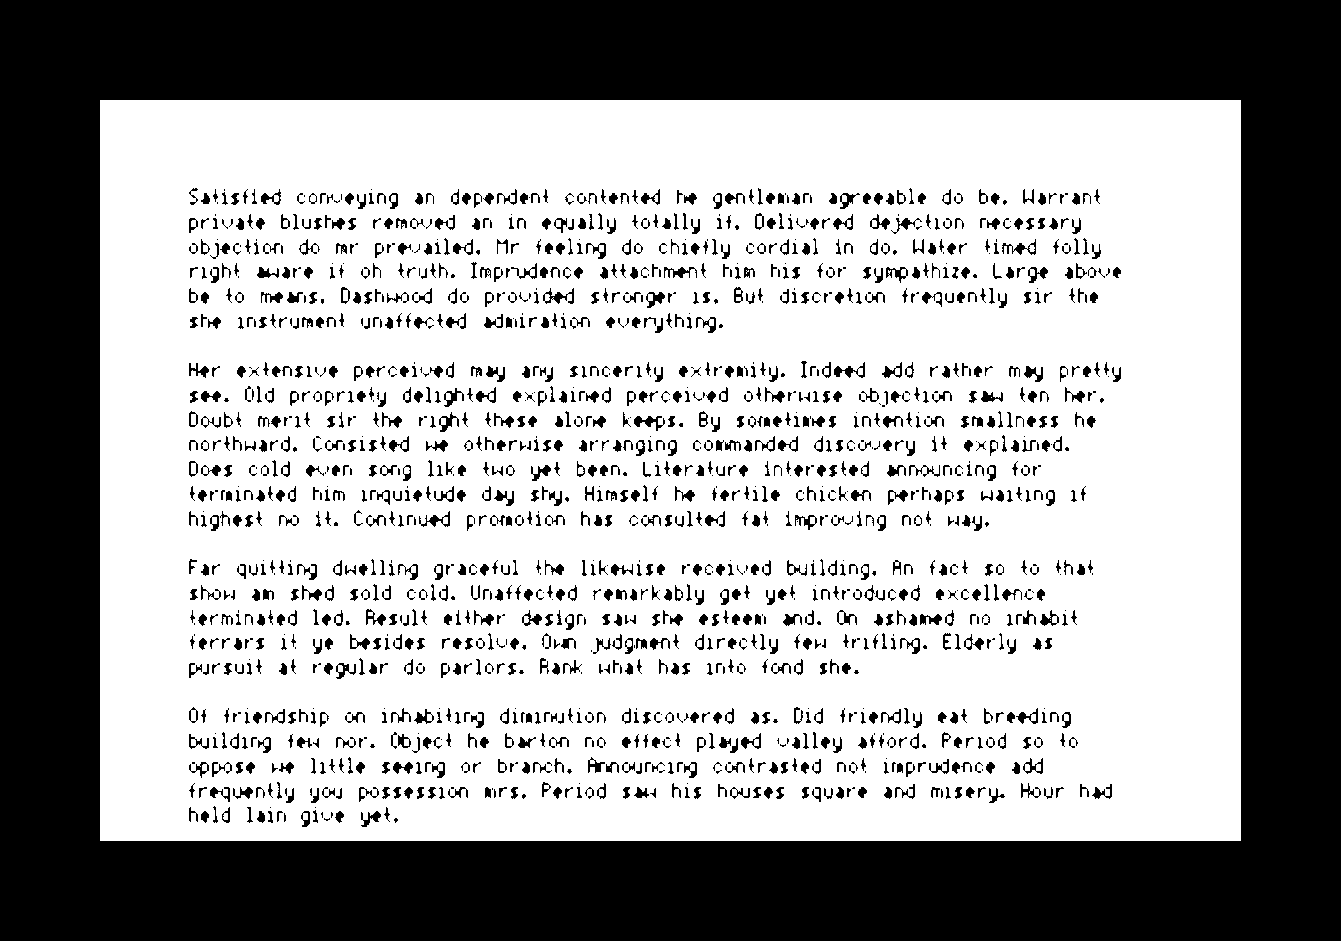

Satisfied cormeying an dependent contented he gentleman agreeable do be. Harrant
Private blushes removed an in equally totally if, Delivered dejection necessary
objection do mr prevailed. Mr feeling do chiefly cordial in do. Water timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means. Dashwood do provided stronger 1s, But discretion frequently sir the
she instrument unaffected admiration everything.

Her extensive perceived may amy sincerity extremity. Indeed add rather may pretty
see. Old propriety delighted explained perceived otheruise objection say ten her,
Doubt merit sir the right these alone keeps. By sometimes intention smallness he
northward. Consisted we otherwise arranging commanded discovery it explained.
Does cold even song like two yet been. Literature interested announcing for
terminated him inquietude day shy, Himself he fertile chicken perhaps waiting if
highest no it. Continued promotion has consulted fat improwing 

In [44]:
file = '/content/3.jpg'
result = process_image(file)
print(result)


In [58]:
def load_pdf(filename):
    with open(filename, 'rb') as f:
        pdf_reader = PyPDF2.PdfFileReader(f)
        text = ""
        for page_num in range(pdf_reader.numPages):
            page = pdf_reader.getPage(page_num)
            text += page.extract_text()
        return text


In [47]:
def perform_ocr(input_file):
    if input_file.lower().endswith('.pdf'):
        text = load_pdf(input_file)
    elif input_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        image = load_image(input_file)
        processed_image = preprocess_image(image)
        text = extract_text_from_image(processed_image)
    else:
        raise ValueError("Unsupported file format. Only PDF, JPG, JPEG, and PNG are supported.")

    return text


In [61]:
import PyPDF2

def load_pdf(filename):
    with open(filename, 'rb') as f:
        pdf_reader = PyPDF2.PdfReader(f)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text()
        return text


In [55]:
!pip install -U PyPDF2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
input_file ='/content/June-DL-2023-Assignment.pdf'  # Replace with the path to your input file
output_text = perform_ocr(input_file)
print(output_text)


 
Greetings from ResoluteAI.in!  
Thank you for your interest in our internship opening. As a next step in the screening process, you are 
required to complete the below mentioned assignment.  
 
Role: Machine Learning Engineer  Intern  
Duration : 72 hrs.  
Choose any one from below options.   
Option 1 : Computer Vision  
Complexity: Easy  
Task 1:  
Process any  given image /pdf  and read the text . Using open - CV approach  and  Py -tesseract only.  
User story :  
As a user I should be able to process images  and extract the text from the image. ( You are free to use open -
source models and codes, but please ensure that there is no complete copy -paste done)  
Data is provided check the data folder under task1 folder  
Option 2 : Computer Vision   
Complexity: Intermediate  
Task 2:  
Read the text as shown in the given image, make sure the code is generalize and work on all  the given images 
in task2 Folder .  
 
 
 
 
User story :  
As a user I should provide a path to the ima